## Classification : Decision Tree  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [2]:
#은행 데이터
bank=pd.read_csv("bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### EDA

In [3]:
bank.info()
bank.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


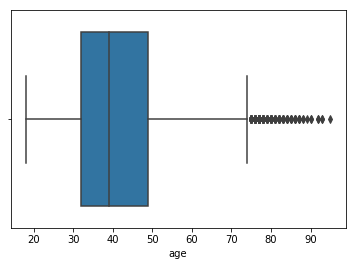

In [5]:
sns.boxplot(x=bank["age"])

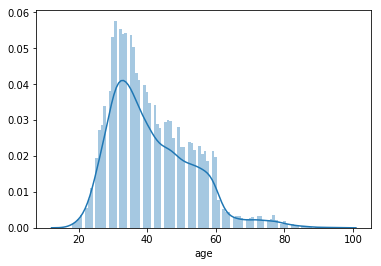

In [6]:
sns.distplot(bank.age, bins=100)

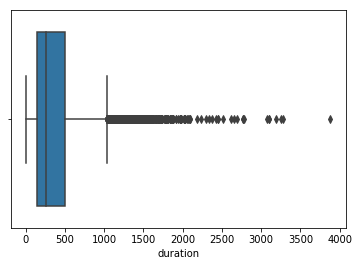

In [7]:
sns.boxplot(x=bank["duration"])

In [8]:
bankData=bank.copy()

In [9]:
bankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [10]:
bankData["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [11]:
bankData.groupby("job").size()

job
admin.           1334
blue-collar      1944
entrepreneur      328
housemaid         274
management       2566
retired           778
self-employed     405
services          923
student           360
technician       1823
unemployed        357
unknown            70
dtype: int64

In [12]:
bankData[(bankData["job"]=="admin.") & (bankData["deposit"]=="yes")]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
18,41,admin.,married,secondary,no,55,yes,no,unknown,8,may,1120,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,35,admin.,married,secondary,no,2374,yes,no,cellular,11,aug,765,2,183,5,success,yes
5255,33,admin.,married,unknown,no,2780,no,no,cellular,19,nov,485,1,-1,0,unknown,yes
5267,32,admin.,married,tertiary,no,284,yes,no,cellular,29,apr,717,3,-1,0,unknown,yes
5283,45,admin.,divorced,secondary,no,0,no,no,cellular,29,oct,264,1,-1,0,unknown,yes


In [13]:
jobs=list(set(bankData.job.values))

In [14]:
for job in jobs:
    print("{:15}:{:5}".format(job, len(bankData[(bankData["deposit"]=="yes") & (bankData["job"]==job)])))

unemployed     :  202
retired        :  516
management     : 1301
student        :  269
housemaid      :  109
services       :  369
blue-collar    :  708
entrepreneur   :  123
unknown        :   34
self-employed  :  187
technician     :  840
admin.         :  631


In [15]:
bankData["job"]=bankData["job"].replace(["admin.","management"],"white-collar")
bankData["job"]=bankData["job"].replace(["services","housemaid"],"pink-collar")
bankData["job"]=bankData["job"].replace(["student","self-employed","technician","entrepreneur","unknown","unemployed","retired","blue-collar"],"other")

In [16]:
bankData["job"].value_counts()

other           6065
white-collar    3900
pink-collar     1197
Name: job, dtype: int64

In [17]:
bankData["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [18]:
bankData["poutcome"]=bankData["poutcome"].replace("other","unknown")

In [19]:
bankData["poutcome"].value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [20]:
bankData["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [21]:
bankData.drop("contact",axis=1, inplace=True)

In [22]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [23]:
bankData["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [24]:
bankData["default_cat"]=np.where(bankData["default"]=="yes",1,0) #방법1
bankData["default_cat"]=bankData["default"].map({"yes":1,"no":0}) #방법2

In [25]:
bankData.drop("default",axis=1,inplace=True)

In [26]:
bankData

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat
0,59,white-collar,married,secondary,2343,yes,no,5,may,1042,1,-1,0,unknown,yes,0
1,56,white-collar,married,secondary,45,no,no,5,may,1467,1,-1,0,unknown,yes,0
2,41,other,married,secondary,1270,yes,no,5,may,1389,1,-1,0,unknown,yes,0
3,55,pink-collar,married,secondary,2476,yes,no,5,may,579,1,-1,0,unknown,yes,0
4,54,white-collar,married,tertiary,184,no,no,5,may,673,2,-1,0,unknown,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,other,single,primary,1,yes,no,20,apr,257,1,-1,0,unknown,no,0
11158,39,pink-collar,married,secondary,733,no,no,16,jun,83,4,-1,0,unknown,no,0
11159,32,other,single,secondary,29,no,no,19,aug,156,2,-1,0,unknown,no,0
11160,43,other,married,secondary,0,no,yes,8,may,9,2,172,5,failure,no,0


In [27]:
bankData["housing_cat"]=np.where(bankData["housing"]=="yes",1,0)
bankData.drop("housing",axis=1,inplace=True)

In [28]:
bankData["loan_cat"]=np.where(bankData["loan"]=="yes",1,0)
bankData.drop("loan",axis=1,inplace=True)

In [29]:
bankData["deposit_cat"]=np.where(bankData["deposit"]=="yes",1,0)
bankData.drop("deposit",axis=1,inplace=True)

In [30]:
bankData

,age,job,marital,education,balance,day,month,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat
0,59,white-collar,married,secondary,2343,5,may,1042,1,-1,0,unknown,0,1,0,1
1,56,white-collar,married,secondary,45,5,may,1467,1,-1,0,unknown,0,0,0,1
2,41,other,married,secondary,1270,5,may,1389,1,-1,0,unknown,0,1,0,1
3,55,pink-collar,married,secondary,2476,5,may,579,1,-1,0,unknown,0,1,0,1
4,54,white-collar,married,tertiary,184,5,may,673,2,-1,0,unknown,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,other,single,primary,1,20,apr,257,1,-1,0,unknown,0,1,0,0
11158,39,pink-collar,married,secondary,733,16,jun,83,4,-1,0,unknown,0,0,0,0
11159,32,other,single,secondary,29,19,aug,156,2,-1,0,unknown,0,0,0,0
11160,43,other,married,secondary,0,8,may,9,2,172,5,failure,0,0,1,0


In [31]:
bankData.drop("month",axis=1,inplace=True)
bankData.drop("day",axis=1,inplace=True)

In [32]:
bankData

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat
0,59,white-collar,married,secondary,2343,1042,1,-1,0,unknown,0,1,0,1
1,56,white-collar,married,secondary,45,1467,1,-1,0,unknown,0,0,0,1
2,41,other,married,secondary,1270,1389,1,-1,0,unknown,0,1,0,1
3,55,pink-collar,married,secondary,2476,579,1,-1,0,unknown,0,1,0,1
4,54,white-collar,married,tertiary,184,673,2,-1,0,unknown,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,other,single,primary,1,257,1,-1,0,unknown,0,1,0,0
11158,39,pink-collar,married,secondary,733,83,4,-1,0,unknown,0,0,0,0
11159,32,other,single,secondary,29,156,2,-1,0,unknown,0,0,0,0
11160,43,other,married,secondary,0,9,2,172,5,failure,0,0,1,0


In [33]:
#bankData["pdays"]==-1를 모두 10000으로 변경
bankData["pdays"]=np.where(bankData["pdays"]==-1,10000,bankData["pdays"])

In [34]:
bankData["recent_pdays"]=np.where(bankData["pdays"], 1/bankData["pdays"],1/bankData["pdays"] )

In [35]:
bankData["recent_pdays"]

0        0.000100
1        0.000100
2        0.000100
3        0.000100
4        0.000100
           ...   
11157    0.000100
11158    0.000100
11159    0.000100
11160    0.005814
11161    0.000100
Name: recent_pdays, Length: 11162, dtype: float64

In [36]:
bankData.drop("pdays",axis=1,inplace=True)

In [37]:
bankData

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
0,59,white-collar,married,secondary,2343,1042,1,0,unknown,0,1,0,1,0.000100
1,56,white-collar,married,secondary,45,1467,1,0,unknown,0,0,0,1,0.000100
2,41,other,married,secondary,1270,1389,1,0,unknown,0,1,0,1,0.000100
3,55,pink-collar,married,secondary,2476,579,1,0,unknown,0,1,0,1,0.000100
4,54,white-collar,married,tertiary,184,673,2,0,unknown,0,0,0,1,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,other,single,primary,1,257,1,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,0.000100
11159,32,other,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,other,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814


In [38]:
bankWithDummies=pd.get_dummies(data=bankData, columns=["job","marital","education","poutcome"], prefix=["job","marital","education","poutcome"])

In [39]:
bankWithDummies

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0,1,0,0,0.000100,...,0,0,1,1,0,0,0,0,0,1
11158,39,733,83,4,0,0,0,0,0,0.000100,...,0,1,0,0,1,0,0,0,0,1
11159,32,29,156,2,0,0,0,0,0,0.000100,...,0,0,1,0,1,0,0,0,0,1
11160,43,0,9,2,5,0,0,1,0,0.005814,...,0,1,0,0,1,0,0,1,0,0


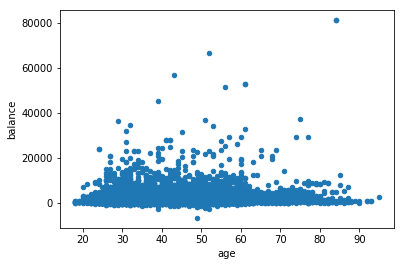

In [40]:
bankWithDummies.plot(kind="scatter", x="age", y="balance")

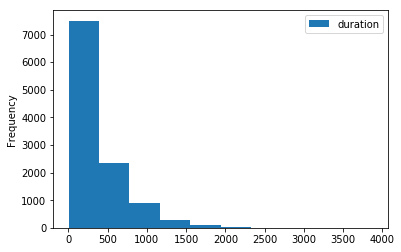

In [41]:
bankWithDummies.plot(kind="hist", x="poutcome_success", y="duration")

In [42]:
bankWithDummies[bankData.deposit_cat==1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
bankWithDummies[(bankWithDummies.deposit_cat==1)&(bankWithDummies.loan_cat)&(bankWithDummies.housing_cat)]

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
5,42,0,562,2,0,0,1,1,1,0.000100,...,0,0,1,0,0,1,0,0,0,1
6,56,830,1201,1,0,0,1,1,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
12,29,199,1689,4,0,0,1,1,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
19,49,168,513,1,0,0,1,1,1,0.000100,...,1,0,0,0,1,0,0,0,0,1
40,60,1262,1015,1,0,0,1,1,1,0.000100,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5223,51,5350,612,4,0,0,1,1,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
5237,24,-389,1242,1,0,0,1,1,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
5239,39,25,658,1,3,0,1,1,1,0.002849,...,0,1,0,0,1,0,0,1,0,0
5253,31,-537,1039,7,0,0,1,1,1,0.000100,...,0,1,0,1,0,0,0,0,0,1


In [44]:
len(bankWithDummies[(bankWithDummies["deposit_cat"]==1) & (bankWithDummies["default_cat"]==1)])
#52명은 정기예금 가입 및 채무불이향도 한 경우

52

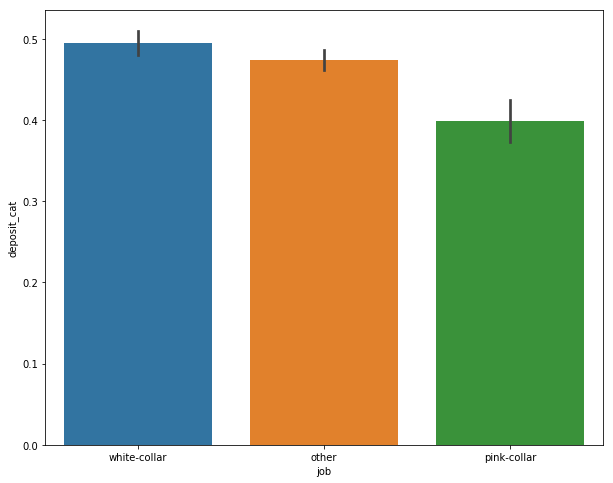

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(x="job", y="deposit_cat", data=bankData)

In [46]:
bankData
bankWithDummies

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0,1,0,0,0.000100,...,0,0,1,1,0,0,0,0,0,1
11158,39,733,83,4,0,0,0,0,0,0.000100,...,0,1,0,0,1,0,0,0,0,1
11159,32,29,156,2,0,0,0,0,0,0.000100,...,0,0,1,0,1,0,0,0,0,1
11160,43,0,9,2,5,0,0,1,0,0.005814,...,0,1,0,0,1,0,0,1,0,0


In [47]:
bankwd=bankWithDummies
corr=bankwd.corr()

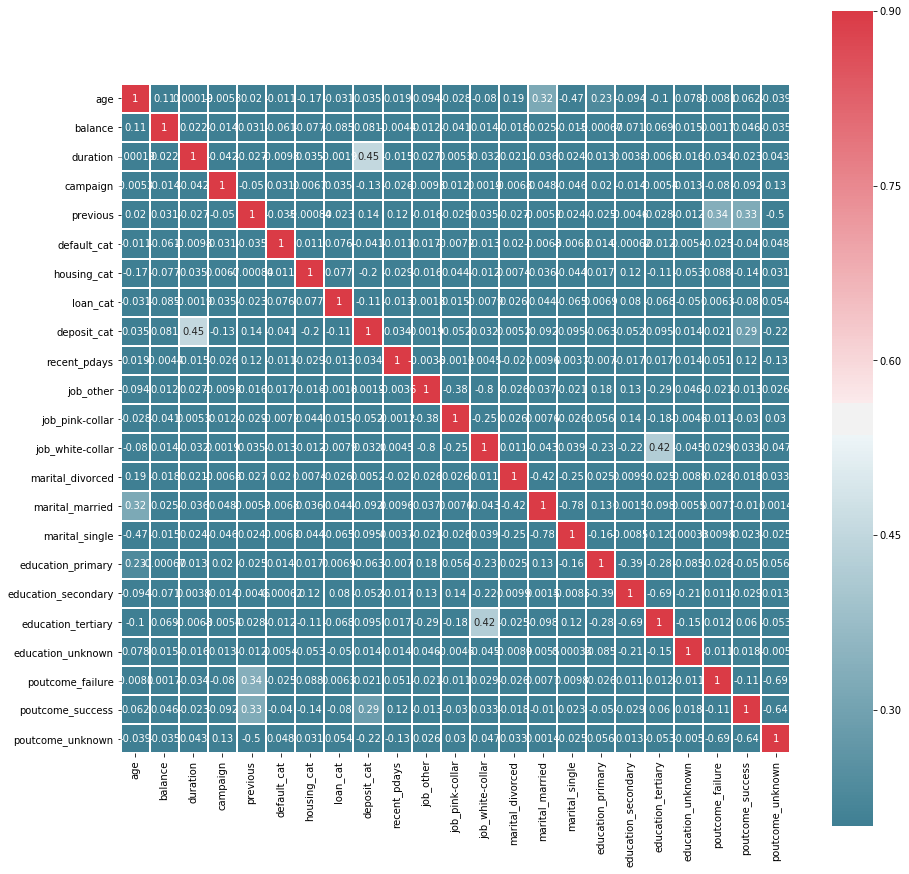

In [48]:
plt.figure(figsize=(15,15))
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidth=1, square=True, annot=True, vmin= 0.2 ,vmax=0.9)

In [49]:
corr_deposit=pd.DataFrame(corr["deposit_cat"].drop("deposit_cat"))

In [50]:
corr_deposit["deposit_cat"].sort_values(ascending=False)
#양의 상관관계가 가장 높은 것은 durantion.poutcome_success

duration               0.451919
poutcome_success       0.286642
previous               0.139867
marital_single         0.094632
education_tertiary     0.094598
balance                0.081129
age                    0.034901
recent_pdays           0.034457
job_white-collar       0.031621
poutcome_failure       0.020714
education_unknown      0.014355
marital_divorced       0.005228
job_other              0.001859
default_cat           -0.040680
job_pink-collar       -0.051717
education_secondary   -0.051952
education_primary     -0.063002
marital_married       -0.092157
loan_cat              -0.110580
campaign              -0.128081
housing_cat           -0.203888
poutcome_unknown      -0.224785
Name: deposit_cat, dtype: float64

In [51]:
#모델 
dropDeposit= bankwd.drop("deposit_cat",1) #입력
label=bankwd.deposit_cat

In [52]:
dataTrain, dataTest, labelTrain, labelTest=train_test_split(dropDeposit,label, train_size=0.2, random_state=42)

In [53]:
dt2=tree.DecisionTreeClassifier(max_depth=10)
dt2.fit(dataTrain, labelTrain)
dt2_sc_train=dt2.score(dataTrain, labelTrain)
dt2_sc_test=dt2.score(dataTest, labelTest)

In [54]:
print("트레이닝 스코어:", dt2_sc_train)
print("테스트 스코어:", dt2_sc_test)

트레이닝 스코어: 0.9041218637992832
테스트 스코어: 0.7641657334826428


## 연습문제(타이타닉 데이터셋)
-생존여부(출력변수)

-decision Tree(최적 depth)

-train과 test정확도

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [121]:
train=pd.read_csv("titanic/train.csv")
test=pd.read_csv("titanic/test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [122]:
#Train/Test Null값 확인

print(train.isnull().sum()) #Age 177 , Cabin 687, Embarked 2
print(test.isnull().sum())  #Age 86 , Cabin 327, Fare 1

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [123]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [124]:
#Age컬럼 0,1로 변환
train["Sex"]=np.where(train["Sex"]=="male",0,1)
test["Sex"]=np.where(test["Sex"]=="male",0,1)

In [125]:
# Embarked Null 값이 들어있는 컬럼 제거
train["Embarked"].dropna(inplace=True)

In [126]:
train["Embarked"].isnull().sum()

0

In [127]:
#Pclass,Embarked 원핫인코딩
titanicDummies_Train=pd.get_dummies(data=train, columns=["Embarked","Pclass"], prefix=["Embarked","Pclass"])
titanicDummies_Train

titanicDummies_Test=pd.get_dummies(data=test, columns=["Embarked","Pclass"], prefix=["Embarked","Pclass"])
titanicDummies_Test

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0,1,0,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0,0,1,0,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1,0,0,1,0,0
415,1307,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,1,0,0,1
416,1308,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0,0,1,0,0,1


#### Age의 Null 값, Name 호칭의 평균나이로 대체   

In [128]:
#호칭 추출
titanicDummies_Train["title"]=titanicDummies_Train["Name"].str.extract(" ([A-Za-z]+)\.")
titanicDummies_Train["title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Jonkheer      1
Lady          1
Mme           1
Don           1
Capt          1
Sir           1
Ms            1
Name: title, dtype: int64

In [129]:
titanicDummies_Test["title"]=titanicDummies_Test["Name"].str.extract(" ([A-Za-z]+)\.")
titanicDummies_Test["title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: title, dtype: int64

In [130]:
#Age가 Null인 호칭 확인
titanicDummies_Train[titanicDummies_Train["Age"].isnull()].groupby("title")["Age"].size() 

title
Dr          1
Master      4
Miss       36
Mr        119
Mrs        17
Name: Age, dtype: int64

In [131]:
titanicDummies_Test[titanicDummies_Test["Age"].isnull()].groupby("title")["Age"].size()

title
Master     4
Miss      14
Mr        57
Mrs       10
Ms         1
Name: Age, dtype: int64

#### Train 데이터 Age컬럼 Null값 채우기  

In [132]:
print(titanicDummies_Train[titanicDummies_Train["title"]=="Mr"]["Age"].mean()) #32.4
print(titanicDummies_Train[titanicDummies_Train["title"]=="Miss"]["Age"].mean()) #21.8
print(titanicDummies_Train[titanicDummies_Train["title"]=="Mrs"]["Age"].mean()) #35.9
print(titanicDummies_Train[titanicDummies_Train["title"]=="Dr"]["Age"].mean()) #42.0
print(titanicDummies_Train[titanicDummies_Train["title"]=="Master"]["Age"].mean()) #4.6

32.368090452261306
21.773972602739725
35.898148148148145
42.0
4.574166666666667


In [133]:
titanicDummies_Train.loc[titanicDummies_Train["title"]=="Mr","Age"]=titanicDummies_Train.loc[titanicDummies_Train["title"]=="Mr","Age"].fillna(32.4)
titanicDummies_Train.loc[titanicDummies_Train["title"]=="Miss","Age"]=titanicDummies_Train.loc[titanicDummies_Train["title"]=="Miss","Age"].fillna(21.8)
titanicDummies_Train.loc[titanicDummies_Train["title"]=="Mrs","Age"]=titanicDummies_Train.loc[titanicDummies_Train["title"]=="Mrs","Age"].fillna(35.9)
titanicDummies_Train.loc[titanicDummies_Train["title"]=="Dr","Age"]=titanicDummies_Train.loc[titanicDummies_Train["title"]=="Dr","Age"].fillna(42.0)
titanicDummies_Train.loc[titanicDummies_Train["title"]=="Master","Age"]=titanicDummies_Train.loc[titanicDummies_Train["title"]=="Master","Age"].fillna(4.6)

In [134]:
#확인
titanicDummies_Train[(titanicDummies_Train["title"]=="Dr")]["Age"].isnull().sum()

0

In [135]:
titanicDummies_Train[(titanicDummies_Train["title"]=="Dr")]["Age"]

245    44.0
317    54.0
398    23.0
632    32.0
660    50.0
766    42.0
796    49.0
Name: Age, dtype: float64

In [136]:
print(titanicDummies_Test[titanicDummies_Test["title"]=="Master"]["Age"].mean()) #7.4
print(titanicDummies_Test[titanicDummies_Test["title"]=="Miss"]["Age"].mean()) #21.8
print(titanicDummies_Test[titanicDummies_Test["title"]=="Mr"]["Age"].mean()) #32.0
print(titanicDummies_Test[titanicDummies_Test["title"]=="Mrs"]["Age"].mean()) #38.9
print(titanicDummies_Test[titanicDummies_Test["title"]=="Ms"]["Age"].mean()) #nan

7.406470588235294
21.774843750000002
32.0
38.903225806451616
nan


In [137]:
titanicDummies_Test.loc[titanicDummies_Test["title"]=="Master","Age"]=titanicDummies_Test.loc[titanicDummies_Test["title"]=="Master","Age"].fillna(7.4)
titanicDummies_Test.loc[titanicDummies_Test["title"]=="Miss","Age"]=titanicDummies_Test.loc[titanicDummies_Test["title"]=="Miss","Age"].fillna(21.8)
titanicDummies_Test.loc[titanicDummies_Test["title"]=="Mr","Age"]=titanicDummies_Test.loc[titanicDummies_Test["title"]=="Mr","Age"].fillna(32.0)
titanicDummies_Test.loc[titanicDummies_Test["title"]=="Mrs","Age"]=titanicDummies_Test.loc[titanicDummies_Test["title"]=="Mrs","Age"].fillna(38.9)

In [138]:
titanicDummies_Train[titanicDummies_Train["Age"].isnull()]

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,title


In [139]:
titanicDummies_Test[titanicDummies_Test["Age"].isnull()]

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,title
88,980,"O'Donoghue, Ms. Bridget",1,NaN,0,0,364856,7.75,NaN,0,1,0,0,0,1,Ms


In [140]:
titanicDummies_Test[titanicDummies_Test["Fare"]==7.75]["Age"].mean() #28.3

28.310000000000002

In [141]:
titanicDummies_Test.loc[titanicDummies_Test["title"]=="Ms","Age"]=titanicDummies_Test.loc[titanicDummies_Test["title"]=="Ms","Age"].fillna(28.3)

In [142]:
#train/test 데이터에서 "승객 id, 이름 , 티켓, 케빈" 모델에 필요없는 컬럼 제거

trainX=titanicDummies_Train.drop(["PassengerId","Name","Ticket","Cabin","title"],axis=1)
trainX

testX=titanicDummies_Test.drop(["PassengerId","Name","Ticket","Cabin","title"],axis=1)
testX

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,34.5,0,0,7.8292,0,1,0,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,0,1
2,0,62.0,0,0,9.6875,0,1,0,0,1,0
3,0,27.0,0,0,8.6625,0,0,1,0,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,32.0,0,0,8.0500,0,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,0,1,0,0
415,0,38.5,0,0,7.2500,0,0,1,0,0,1
416,0,32.0,0,0,8.0500,0,0,1,0,0,1


In [143]:
trainX

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,13.0000,0,0,1,0,1,0
887,1,1,19.0,0,0,30.0000,0,0,1,1,0,0
888,0,1,21.8,1,2,23.4500,0,0,1,0,0,1
889,1,0,26.0,0,0,30.0000,1,0,0,1,0,0


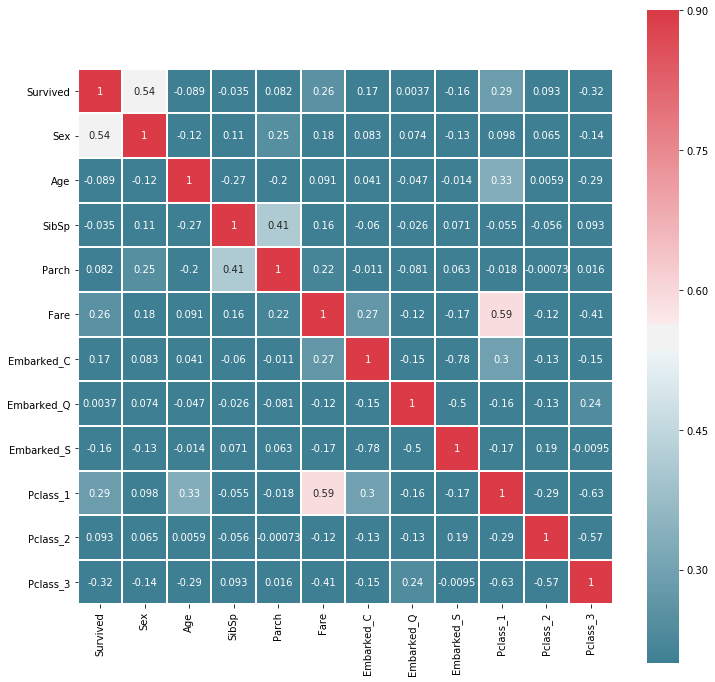

In [144]:
corr=trainX.corr()

plt.figure(figsize=(12,12))
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidth=1, square=True, annot=True, vmin= 0.2 ,vmax=0.9)

In [145]:
trainX.shape

(891, 12)

In [146]:
testX.shape

(418, 11)

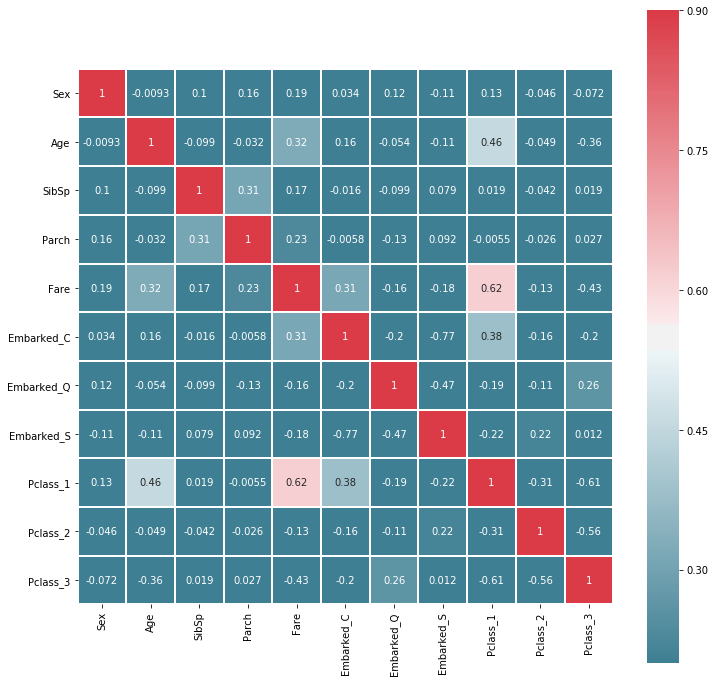

In [147]:
#상관관계로 fare의 Null값 채우기.
corr=testX.corr()

plt.figure(figsize=(12,12))
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidth=1, square=True, annot=True, vmin= 0.2 ,vmax=0.9)

In [148]:
testX[(testX["Pclass_3"]==1)&(testX["Embarked_S"]==1)]["Age"].sort_values(ascending=False) #25

152    60.50
25     50.00
1      47.00
309    45.00
134    43.00
       ...  
263     1.00
307     0.83
281     0.75
201     0.33
354     0.17
Name: Age, Length: 142, dtype: float64

#### test 의 Fare Null값, 비슷한 사람의 Fare로 채우기 

In [149]:
testX[testX.index==25]

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
25,0,50.0,1,0,14.5,0,0,1,0,0,1


In [150]:
testX[testX["Fare"].isnull()] #14.5로 대체

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
152,0,60.5,0,0,NaN,0,0,1,0,0,1


In [151]:
testX["Fare"]=testX["Fare"].fillna(14.5)

In [152]:
testX["Fare"]

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [153]:
#정답데이터
X_label=trainX["Survived"]  #분류예측값
trainX= trainX.drop("Survived",1) #입력

In [154]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 정규화
scaler = MinMaxScaler()

train_final = scaler.fit_transform(np.array(trainX))
test_final= scaler.fit_transform(np.array(testX))

## SVC 

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param = {'C':[1,5,10,20,40,100],
         'gamma':[.1, .25, .5, 1]}

GS = GridSearchCV(SVC(kernel='rbf'), param, cv = 5) #최적의 param값 찾아줌.

GS.fit(train_final, X_label)

print(GS.best_params_) #C: 10, gamma: 0.5 일때
print(GS.best_score_) #0.8226711560044894


# 모델 생성
model = SVC(kernel='rbf', C=10, gamma=0.5).fit(train_final, X_label)

prediction_SVC = model.predict(test_final)
prediction_SVC

# 결과 데이터 csv 생성
sub = pd.read_csv('titanic/gender_submission.csv')
sub['Survived'] = prediction_SVC
sub.to_csv('submission_svc.csv', index=False)

#Kaggle upload result: 0.78468

{'C': 10, 'gamma': 0.5}
0.8226711560044894


## Decision Tree Model

In [37]:
#모델생성
decision_tree =tree.DecisionTreeClassifier(max_depth=15)
decision_tree.fit(train_final, X_label)
Y_pred = decision_tree.predict(test_final)

In [38]:
sub = pd.read_csv("titanic/gender_submission.csv")
sub["Survived"] = Y_pred
sub.to_csv("submission_titanic.csv",index=False)
pd.read_csv("submission_titanic.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [39]:
#Train data에서 Train/Test Split해서 모델 성능평가
dataTrain,dataTest,labelTrain,labelTest = train_test_split(train_final,X_label,train_size=0.8,random_state=42)

In [40]:
dt=tree.DecisionTreeClassifier(max_depth=10)
model = dt.fit(dataTrain,labelTrain)
dt_sc_train=dt.score(dataTrain, labelTrain)
dt_sc_test=dt.score(dataTest, labelTest)

print("트레이닝 스코어:", dt_sc_train) #0.922752808988764
print("테스트 스코어:", dt_sc_test) #0.7988826815642458

#Kaggle upload result: 0.75598

트레이닝 스코어: 0.922752808988764
테스트 스코어: 0.7988826815642458


## MLP (Multi Layer Perceptron)

In [167]:
from sklearn.neural_network import MLPClassifier

MLR=MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(50))
MLR.fit(train_final, X_label)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [168]:
MLR.score(train_final, X_label)

0.8529741863075196

In [169]:
MLR_pred=MLR.predict(test_final)
MLR_pred.shape

(418,)

In [170]:
sub = pd.read_csv("titanic/gender_submission.csv")
sub["Survived"] = MLR_pred
sub.to_csv("submission_MLP.csv",index=False)